## Justin Law
## A12346613

In [1]:
import numpy as np

import numpy.fft as npf

import matplotlib

import matplotlib.pyplot as plt

import time

import imagetools.assignment6 as im

%matplotlib widget
%matplotlib
%matplotlib
%matplotlib

Using matplotlib backend: module://ipympl.backend_nbagg
Using matplotlib backend: module://ipympl.backend_nbagg
Using matplotlib backend: module://ipympl.backend_nbagg


# Q1

```
def average_power_spectral_density(x):
    '''
        x is a list of K images (color or grayscale)
    '''
    
    x_hat = [np.abs(npf.fft2(element,axes=(0,1)))**2 for element in x]
    
    # sum over the third dimension if rgb image
    x_hat = [np.sum(element,axis=2) / 3 for element in x_hat if element.ndim==3]
    
    # take the average as described in Q1
    average_S = sum(x_hat) / len(x)

    return average_S
```

# Q2

In [2]:
eagle, plane, sheeps = plt.imread('assets/eagle.png'),plt.imread('assets/plane.png'),plt.imread('assets/sheeps.png')

In [3]:
apsd = im.average_power_spectral_density([eagle, plane, sheeps])

# Q3

$$S_{u,v} = n_{1}n_{2}e^{\beta}\omega^{\alpha}$$

$$\log{S_{u,v}} = \log{n_{1}} + \log{n_{2}} + \log{e^{\beta}} + \log{\omega^{\alpha}}$$

$$\log{S_{u,v}} = \log{n_{1}} + \log{n_{2}} + \beta + \alpha \log{\omega}$$

$$\log{S_{u,v}} - \log{n_{1}} - \log{n_{2}}  =  \alpha \log{\omega} + \beta$$

$$\text{Let } s_{u,v} = \text{LHS}, t_{u,v} = \log{\omega_{u,v}}$$

$$\text{then, we have } s_{u,v}  =  \alpha t_{u,v} + \beta$$


# Q4

$$\text{Setting } \frac{\partial SSE(\alpha,\beta)}{\partial \alpha} = 0$$

$$
0 = \sum_{u,v} t_{u,v} (\alpha t_{u,v} + \beta - s_{u,v}) \text{     (1) }
$$

$$
0 = \alpha \sum_{u,v} t_{u,v}^2 + \beta \sum_{u,v} t_{u,v} - \sum_{u,v} s_{u,v} t_{u,v} \text{     (1.1) }
$$

$$
\sum_{u,v} s_{u,v} t_{u,v} = \alpha \sum_{u,v} t_{u,v}^2 + \beta \sum_{u,v} t_{u,v} \text{     (1.2) }
$$


$$\text{Setting } \frac{\partial SSE(\alpha,\beta)}{\partial \beta} = 0$$

$$
0 = \sum_{u,v} (\alpha t_{u,v} + \beta - s_{u,v}) \text{     (2) }
$$

$$\text{distributing the sum for equation 2 gives }$$


$$
0 = \alpha \sum_{u,v} t_{u,v} + n_{1} n_{2} \beta - \sum_{u,v} s_{u,v} \text{     (2.1) }
$$

$$
\sum_{u,v} s_{u,v} = \alpha \sum_{u,v} t_{u,v} + n_{1} n_{2} \beta \text{     (2.2) }
$$

We have,

$$\begin{pmatrix} \sum_{u,v} t_{u,v}^2 & \sum_{u,v} t_{u,v}\\\ \sum_{u,v} t_{u,v} & n_{1} n_{2}\end{pmatrix} \begin{pmatrix} \alpha \\ \beta \end{pmatrix} = \begin{pmatrix} \sum_{u,v} s_{u,v} t_{u,v} \\ \sum_{u,v} s_{u,v} \end{pmatrix}$$

$$ \text{Invertible since clearly the determinant is not 0 (since } \omega_{u,v} \text{ is not 0)} $$

$$
\text{det = } n_{1} n_{2} \sum_{u,v} t_{u,v}^2 - (\sum_{u,v} t_{u,v})^2
$$

$$\begin{pmatrix} \alpha \\ \beta \end{pmatrix} = \frac{1}{\text{det}} \begin{pmatrix} n_{1} n_{2} \sum_{u,v} s_{u,v} t_{u,v} + (-\sum_{u,v} t_{u,v}) \sum_{u,v} s_{u,v} \\ (-\sum_{u,v} t_{u,v}) \sum_{u,v} s_{u,v} t_{u,v} + \sum_{u,v} t_{u,v}^2 \sum_{u,v} s_{u,v}\end{pmatrix}$$

# Q5

```
def mean_power_spectrum_density(apsd):
    n1,n2 = apsd.shape
    u,v = fftgrid(n1,n2)

    suv = np.log(apsd/(n1*n2))
    omegas = np.sqrt((u/n1)**2 + (v/n2)**2)
    
    # preprocessing
    omegas[omegas==0] = 1 # set to 1 so that not included in sum
    suv[0,0] = 0 # set to 0 so not included in sum
    
    # calculate t(u,v) and s(u,v)*t(u,v)
    tuv = np.log(omegas)
    suv_tuv = suv*tuv
    
    det = (n1 * n2 * np.sum(tuv**2)) - (np.sum(tuv)**2)
    
    alpha = (n1 * n2 * np.sum(suv_tuv)) - (np.sum(tuv) * np.sum(suv))
    alpha /= det
    
    beta = (np.sum(tuv**2) * np.sum(suv)) - (np.sum(tuv) * np.sum(suv_tuv))
    beta /= det                           
   
    mpsd = n1*n2* np.exp(beta) * (omegas**alpha)
    mpsd[0,0] = np.inf
    return mpsd, alpha, beta

```

# Q6

In [4]:
mpsd,alpha,beta = im.mean_power_spectrum_density(apsd)

## Values of alpha,beta are below

In [5]:
alpha

-2.9228092129698786

In [6]:
beta

-9.768803882158243

# Q7

## Averaged PSD

/usr/local/lib/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


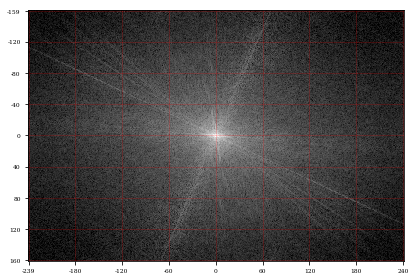

In [7]:
im.showfft(apsd, apply_log=True, vmin=-10, vmax=5)

## Mean PSD

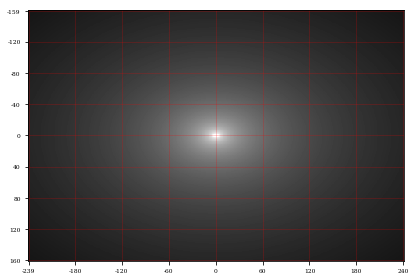

In [8]:
im.showfft(mpsd, apply_log=True, vmin=-10, vmax=5)

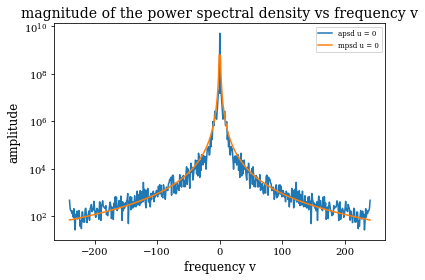

In [9]:
ax = im.plot_log(0,['apsd u = 0','mpsd u = 0'],apsd,mpsd)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_xlabel('frequency v',fontdict = {'fontsize' : 12})
ax.set_ylabel('amplitude',fontdict = {'fontsize' : 12})
ax.set_title('magnitude of the power spectral density vs frequency v',fontdict = {'fontsize' : 14})
ax.legend()

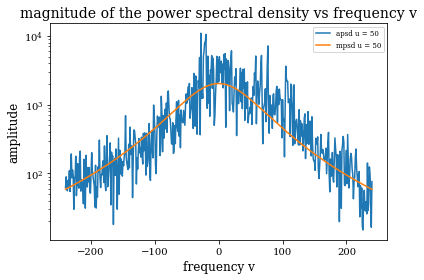

In [10]:
ax = im.plot_log(50,['apsd u = 50','mpsd u = 50'],apsd,mpsd)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_xlabel('frequency v',fontdict = {'fontsize' : 12})
ax.set_ylabel('amplitude',fontdict = {'fontsize' : 12})
ax.set_title('magnitude of the power spectral density vs frequency v',fontdict = {'fontsize' : 14})
ax.legend()

# Part 2 - Deconvolution

# Q8

## Load an display owls_blur along with the log of its psd

In [11]:
y = plt.imread('assets/owls_blur.png')

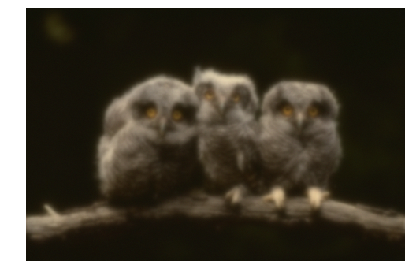

In [12]:
im.show(y)

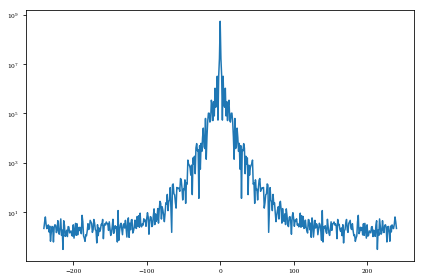

In [13]:
im.plot_log(0,['owls_blur with u=0'],im.average_power_spectral_density([y]))

# Q9

## Create lbd for exponential with tau=2

In [14]:
lbd = im.kernel2fft(im.kernel('exponential',tau=2), *mpsd.shape)

# Q10

```
def deconvolve_naive(y, lbd, return_transfer=False):
    hhat = np.conjugate(lbd) / np.power(np.abs(lbd),2)
    yhat = npf.fftn(y)
    if y.ndim==3:
        hhat3d = np.repeat(hhat[:, :, np.newaxis], 3, axis=2)
        xdec = np.real(npf.ifftn(yhat*hhat3d))
    else:
        xdec = np.real(npf.ifftn(yhat*hhat))
        
    if return_transfer: 
        return xdec, hhat
    else:
        return xdec
```

# Q11

### Exponential - Transfer function (naive)

In [15]:
x = plt.imread('assets/owls_blur.png')

In [16]:
lbd = im.kernel2fft(im.kernel('exponential',tau=2), *mpsd.shape)

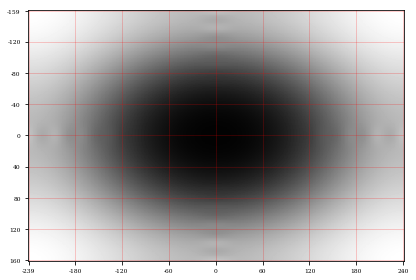

In [17]:
_,hhat = im.deconvolve_naive(x, lbd, return_transfer=True)
im.showfft(np.abs(hhat))

# Q11

### Gaussian - Transfer function (naive)

In [18]:
lbd = im.kernel2fft(im.kernel('gaussian',tau=2), *mpsd.shape)

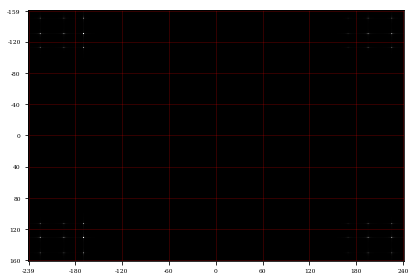

In [19]:
_,hhat = im.deconvolve_naive(x, lbd, return_transfer=True)
im.showfft(np.abs(hhat))

### Box - Transfer function (naive)

In [20]:
lbd = im.kernel2fft(im.kernel('box',tau=2), *mpsd.shape)

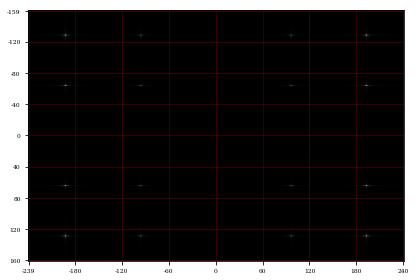

In [21]:
_,hhat = im.deconvolve_naive(x, lbd, return_transfer=True)
im.showfft(np.abs(hhat))

# Q12
## Answer
As $\sigma$ approaches 0, the transfer function for the wiener deconvolution is the naive deconvolution transfer function. By applying this filter, you are simply deconvolving the image by performing the inverse operation of the filter.

As $\sigma$ approaches infinity, the tranfer function approaches 0. This makes sense, because a image is unrecoverable when there is too much noise.

# Q13

```
def deconvolve_wiener(x, lbd, sig, mpsd, return_transfer=False):
    n1,n2 = x.shape[:2]
    hhat = np.conjugate(lbd)
    lhs = np.power(np.abs(lbd),2) 
    rhs = n1*n2*(sig**2)*np.reciprocal(mpsd)
    hhat /= (lhs + rhs)
    yhat = npf.fftn(x)
    
    if x.ndim==3:
        hhat3d = np.repeat(hhat[:, :, np.newaxis], 3, axis=2)
        xdec = np.real(npf.ifftn(yhat*hhat3d))
    else:
        xdec = np.real(npf.ifftn(yhat*hhat))

    if return_transfer: 
        return xdec, hhat
    else:
        return xdec
```

In [22]:
apsd = im.average_power_spectral_density([eagle, plane, sheeps])
mpsd,_,_ = im.mean_power_spectrum_density(apsd)

x = plt.imread('assets/owls_blur.png')
lbd = im.kernel2fft(im.kernel('exponential',tau=2), *mpsd.shape)

### Blurry image

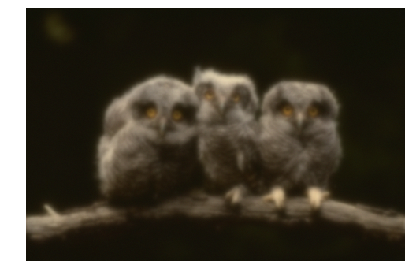

In [23]:
im.show(x)

### Naive deconvolution 

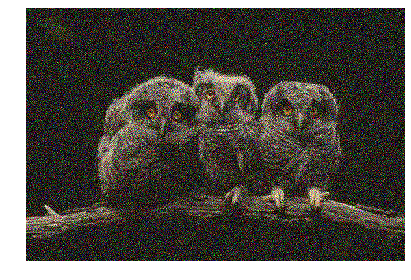

In [24]:
im.show(im.deconvolve_naive(x, lbd, return_transfer=False))

### Wiener deconvolution 

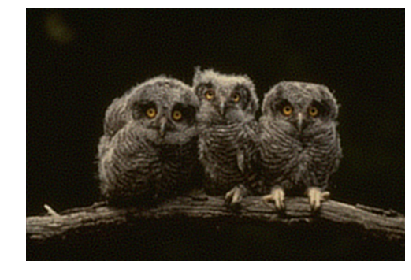

In [25]:
sig = 1/255
im.show(im.deconvolve_wiener(x, lbd, sig, mpsd, return_transfer=False))

### Transfer function (exponential)

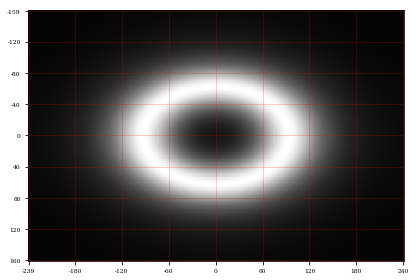

In [26]:
_,hhat = im.deconvolve_wiener(x, lbd, sig, mpsd, return_transfer=True)
im.showfft(np.abs(hhat))

# Q14

## Answer
The weiner deconvolution reverses the effects of an image convolved with a filter. The naive implementation simply reverses the convolution. But the weiner deconvolution
takes into account the noise by adding the extra term in the denominator. Therefore, the weiner deconvolution filters out the noise assoicated with the convolution in the first place, resulting in a new image with the random noise filtered out of the correct filter is chosen (see exponential above).

# Q15

## Answer
Just by inspection of the deconvolved image, the exponential filter in Q14 gives the best results. This could be because the original image was convolved with an exponential filter (could be... because it could be a filter with similar weights). 

# Gaussian

In [27]:
apsd = im.average_power_spectral_density([eagle, plane, sheeps])
mpsd,_,_ = im.mean_power_spectrum_density(apsd)

x = plt.imread('assets/owls_blur.png')
lbd = im.kernel2fft(im.kernel('gaussian',tau=2), *mpsd.shape)

### Blurry image

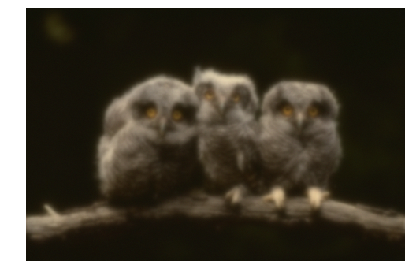

In [28]:
im.show(x)

### Naive deconvolution 

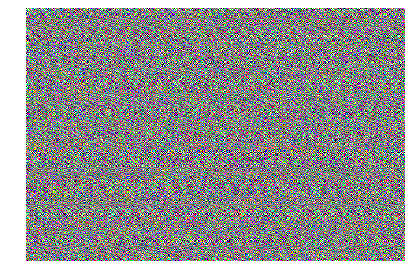

In [29]:
im.show(im.deconvolve_naive(x, lbd, return_transfer=False))

### Wiener deconvolution 

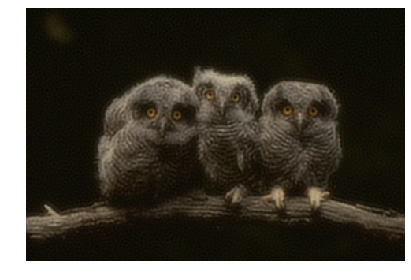

In [30]:
sig = 1/255
im.show(im.deconvolve_wiener(x, lbd, sig, mpsd, return_transfer=False))

### Transfer function (gaussian)

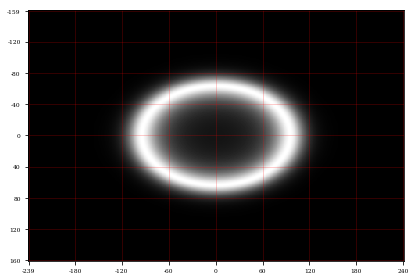

In [31]:
_,hhat = im.deconvolve_wiener(x, lbd, sig, mpsd, return_transfer=True)
im.showfft(np.abs(hhat))

# Box

In [32]:
apsd = im.average_power_spectral_density([eagle, plane, sheeps])
mpsd,_,_ = im.mean_power_spectrum_density(apsd)

x = plt.imread('assets/owls_blur.png')
lbd = im.kernel2fft(im.kernel('box',tau=2), *mpsd.shape)

### Blurry image

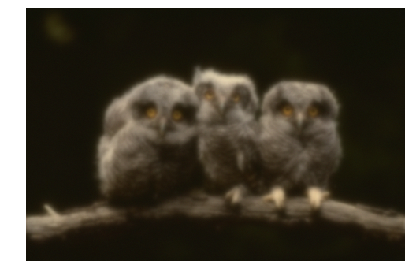

In [33]:
im.show(x)

### Naive deconvolution 

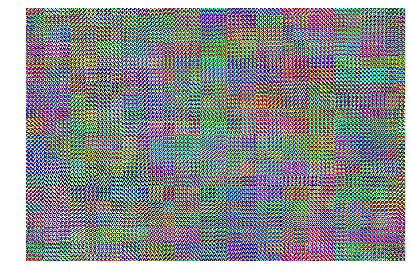

In [34]:
im.show(im.deconvolve_naive(x, lbd, return_transfer=False))

### Wiener deconvolution 

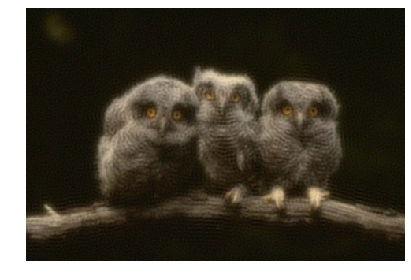

In [35]:
sig = 1/255
im.show(im.deconvolve_wiener(x, lbd, sig, mpsd, return_transfer=False))

### Transfer function (box)

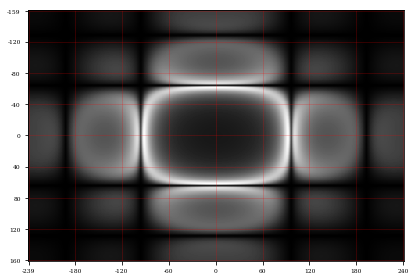

In [36]:
_,hhat = im.deconvolve_wiener(x, lbd, sig, mpsd, return_transfer=True)
im.showfft(np.abs(hhat))